<a href="https://colab.research.google.com/github/arshad831/1-Langchain/blob/main/random_for_withtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries. Scikit-learn is essential for the Random Forest model [2].
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- STEP 1: MAKE UP SOME FAKE SENSOR DATA --- [1]
# Create 1000 data points (simulating 1000 instances of sensor readings)
N_SAMPLES = 10000

# Create realistic-looking data for temperature and vibration, which are common sensor readings [3].
# Temperature readings (e.g., centered around 70)
temperature = np.random.normal(loc=70, scale=8, size=N_SAMPLES)
# Vibration readings (e.g., centered around 5)
vibration = np.random.normal(loc=5, scale=2, size=N_SAMPLES)
# Pressure readings (as a potentially noisy, less predictive feature) [3]
pressure = np.random.normal(loc=100, scale=10, size=N_SAMPLES)

# Combine the data into a DataFrame for easier handling
data = pd.DataFrame({
    'Temperature': temperature,
    'Vibration': vibration,
    'Pressure': pressure
})

# --- STEP 2: CREATE A SIMPLE RULE FOR FAILURE (THE 'FINGERPRINT') --- [1, 2]
# A failure that is about to happen leaves a fingerprint or pattern in the data [3].
# We define a failure based on the rule: High Temp (e.g., > 80) AND High Vibration (e.g., > 7) [1, 2].

# Initialize the target variable (0 = No Failure, 1 = Failure)
data['Failure_Indicator'] = 0

# Apply the failure rule: If both conditions are met, set the indicator to 1.
failure_condition = (data['Temperature'] > 80) & (data['Vibration'] > 7)
data.loc[failure_condition, 'Failure_Indicator'] = 1

print("--- SYNTHETIC DATA CREATED ---")
print(f"Total instances: {N_SAMPLES}")
print(f"Failure instances (1): {data['Failure_Indicator'].sum()}")
print("-" * 30)

# Define features (X) and target (y)
X = data[['Temperature', 'Vibration', 'Pressure']]
y = data['Failure_Indicator']

# Split the data into training and testing sets [1].
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- STEP 3: TRAIN THE RANDOM FOREST MODEL --- [1]
# Ensemble methods use a team of models [3, 4]. Random Forest is a classic bagging method [5].

# Import the Random Forest Classifier [2].
# We create our model, telling it we want a team of 50 decision trees (n_estimators=50) [2].
# The collective intelligence of many models creates a much stronger conclusion [4].
model = RandomForestClassifier(n_estimators=50, random_state=42)

# This line, model.fit, tells our team of detectives (the 50 trees) to study the evidence (X_train)
# and learn the patterns (y_train) [2].
model.fit(X_train, y_train)

# --- STEP 4: TEST THE MODEL --- [1]
# Predict on the test data to see if it learned the pattern correctly [1].
predictions = model.predict(X_test)

# Calculate and display the accuracy [6].
accuracy = accuracy_score(y_test, predictions)

print(f"Model Training Status: COMPLETE")
print(f"Accuracy on Test Data: {accuracy:.4f} (The sources show high accuracy, around 95%, is typical for these models [6])")
print("-" * 30)

# --- INSIGHTS ---
# This exercise shows how an ensemble automatically figures out complex relationships,
# such as the rule we made up about high temp plus high vibration [2].
# Ensembles are powerful masters at finding tricky nonlinear patterns [7].


--- SYNTHETIC DATA CREATED ---
Total instances: 10000
Failure instances (1): 148
------------------------------
Model Training Status: COMPLETE
Accuracy on Test Data: 1.0000 (The sources show high accuracy, around 95%, is typical for these models [6])
------------------------------


In [8]:
# Import necessary libraries. Scikit-learn is essential for implementing ensemble methods.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# We import the Random Forest Classifier, which is the recommended ensemble model [1, 2].
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- STEP 1: MAKE UP SOME FAKE SENSOR DATA ---
# Simulate constant streaming data from machinery: Temperature, vibration, pressure [5].
N_SAMPLES = 10000

# Create synthetic data points for features
temperature = np.random.normal(loc=70, scale=8, size=N_SAMPLES)
vibration = np.random.normal(loc=5, scale=2, size=N_SAMPLES)
pressure = np.random.normal(loc=100, scale=10, size=N_SAMPLES)

# Combine the sensor data into a DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Vibration': vibration,
    'Pressure': pressure
})

# --- STEP 2: CREATE A SIMPLE RULE FOR FAILURE (THE 'FINGERPRINT') ---
# A failure leaves a complex, non-linear pattern or "fingerprint" in the data [4, 5].
# We define a failure rule (1) as high temp (e.g., > 80) AND high vibration (e.g., > 7).

# Initialize the target variable (0 = No Failure, 1 = Failure)
data['Failure_Indicator'] = 0

# Apply the failure rule (the pattern the ensemble model must learn)
failure_condition = (data['Temperature'] > 80) & (data['Vibration'] > 7)
data.loc[failure_condition, 'Failure_Indicator'] = 1 # Set the indicator to 1 for instances matching the fingerprint

print("--- Synthetic Data Generated ---")
print(f"Total instances of failure pattern found: {data['Failure_Indicator'].sum()}")
print("-" * 30)

# Define features (X) and target (y)
X = data[['Temperature', 'Vibration', 'Pressure']]
y = data['Failure_Indicator']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- STEP 3: TRAIN THE RANDOM FOREST ENSEMBLE MODEL ---
# Random Forest uses a democratic election approach (bagging) [3].

# Create the model, telling it "we want a team of 50 decision trees" (n_estimators=50) [1].
model = RandomForestClassifier(n_estimators=5, random_state=42)

# The crucial training step: 'model.fit'. This tells the team of detectives to
# "go study the evidence and learn the patterns" [1].
model.fit(X_train, y_train)

# --- STEP 4: TEST THE MODEL ---
# Test the model on unseen data to ensure it learned the pattern correctly [1].
predictions = model.predict(X_test)

# Calculate and display the accuracy of the predictions.
accuracy = accuracy_score(y_test, predictions)

print(f"Model Training Status: COMPLETE")
print(f"Accuracy on Test Data: {accuracy:.4f}")
print("-" * 30)

# The ensemble method automatically figures out complex relationships like the rule
# we made up about high temp plus high vibration [1].

--- Synthetic Data Generated ---
Total instances of failure pattern found: 167
------------------------------
Model Training Status: COMPLETE
Accuracy on Test Data: 0.9990
------------------------------


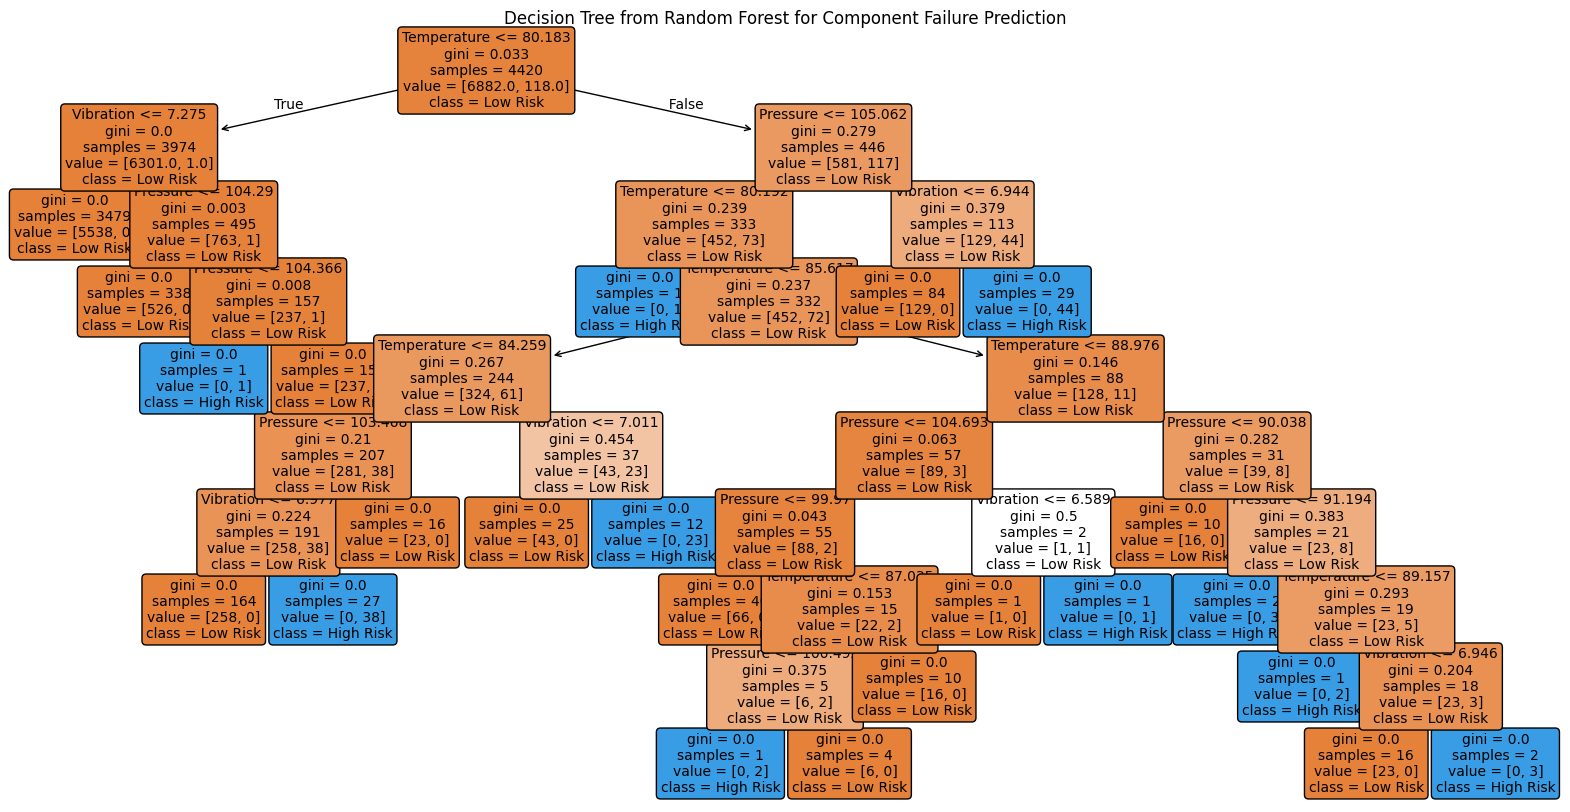

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Select the first tree from the Random Forest ensemble
first_tree = model.estimators_[0]

plot_tree(
    first_tree, # Pass a single decision tree here
    feature_names=list(X.columns),
    class_names=['Low Risk', 'High Risk'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title(f"Decision Tree from Random Forest for Component Failure Prediction") # Removed MAX_DEPTH as it's not defined
plt.show()